In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../raw_data/crime_new-2009-2019_addzip.csv')
df.head()

,Report Number,Report Date,Occur Date,Occur Time,Occur time (fixed),Possible Date,Possible Time,Possible time (fixed),Beat,Location,Zipcode,UCR Literal,UCR #,Neighborhood,Latitude,Longitude,Possible Date New,Poss YEAR
0,90010930,"1,01,2009","1,01,2009",1145,11:45,"1,01,2009",1148,11:48:00,411,2841 GREENBRIAR PKWY,30331,LARCENY-NON VEHICLE,630,Greenbriar,33.68845,-84.49328,1/1/2009,2009
1,90011083,"1,01,2009","1,01,2009",1330,13:30,"1,01,2009",1330,13:30:00,511,12 BROAD ST SW,30303,LARCENY-NON VEHICLE,630,Downtown,33.75320,-84.39201,1/1/2009,2009
2,90011208,"1,01,2009","1,01,2009",1500,15:00,"1,01,2009",1520,15:20:00,407,3500 MARTIN L KING JR DR SW,30331,LARCENY-NON VEHICLE,630,Adamsville,33.75735,-84.50282,1/1/2009,2009
3,90011218,"1,01,2009","1,01,2009",1450,14:50,"1,01,2009",1510,15:10:00,210,3393 PEACHTREE RD NE,30326,LARCENY-NON VEHICLE,630,Lenox,33.84676,-84.36212,1/1/2009,2009
4,90011289,"1,01,2009","1,01,2009",1600,16:00,"1,01,2009",1700,17:00:00,411,2841 GREENBRIAR PKWY SW,30331,LARCENY-NON VEHICLE,630,Greenbriar,33.68677,-84.49773,1/1/2009,2009


In [3]:
df['Possible Date New'] = pd.to_datetime(df['Possible Date New'])
df.dtypes

Report Number                     int64
Report Date                      object
Occur Date                       object
Occur Time                        int64
Occur time (fixed)               object
Possible Date                    object
Possible Time                     int64
Possible time (fixed)            object
Beat                              int64
Location                         object
Zipcode                           int64
UCR Literal                      object
UCR #                             int64
Neighborhood                     object
Latitude                        float64
Longitude                       float64
Possible Date New        datetime64[ns]
Poss YEAR                         int64
dtype: object

In [4]:
new_df = df.groupby('Possible Date New').count()['UCR Literal'].to_frame()
new_df.reset_index(inplace=True)
new_df

,Possible Date New,UCR Literal
0,2009-01-01,116
1,2009-01-02,136
2,2009-01-03,113
3,2009-01-04,97
4,2009-01-05,129
...,...,...
4012,2019-12-27,58
4013,2019-12-28,61
4014,2019-12-29,72
4015,2019-12-30,90


In [5]:
#Changing column names to 'ds' and 'y' for the model
new_df.columns = ['ds', 'y']
new_df.head()

,ds,y
0,2009-01-01,116
1,2009-01-02,136
2,2009-01-03,113
3,2009-01-04,97
4,2009-01-05,129


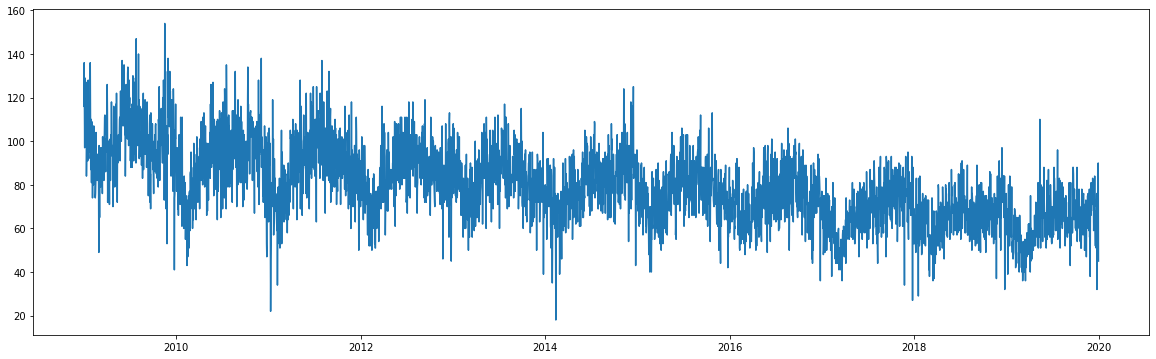

In [6]:
#Creating a plot showing our data
fig = plt.figure(facecolor='w', figsize=(20,6))
plt.plot(new_df.ds, new_df.y)

In [7]:
#Creating a range to set our train/test groups
range = (new_df['ds'] >= '2009-01-01') & (new_df['ds'] <= '2017-11-01')
print(new_df.loc[range])

             ds    y
0    2009-01-01  116
1    2009-01-02  136
2    2009-01-03  113
3    2009-01-04   97
4    2009-01-05  129
...         ...  ...
3222 2017-10-28   87
3223 2017-10-29   83
3224 2017-10-30   75
3225 2017-10-31   82
3226 2017-11-01   90

[3227 rows x 2 columns]


In [8]:
#Finding perfect to split data up 80/20 for testing/training set
#3227/4017

In [9]:
train = new_df[(new_df['ds'] >= '2009-01-01') & (new_df['ds'] <= '2017-11-01')]
test = new_df[(new_df['ds'] > '2017-11-01')]

In [10]:
train.tail()

,ds,y
3222,2017-10-28,87
3223,2017-10-29,83
3224,2017-10-30,75
3225,2017-10-31,82
3226,2017-11-01,90


In [11]:
test.head()

,ds,y
3227,2017-11-02,78
3228,2017-11-03,71
3229,2017-11-04,61
3230,2017-11-05,76
3231,2017-11-06,87


In [ ]:
#Finding best hyperparameters for our model
#Coding is from Prophet's documentation which can be found here: "https://facebook.github.io/prophet/docs/diagnostics.html"

# import itertools
# from fbprophet.diagnostics import cross_validation, performance_metrics
# # Python
# param_grid = {  
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
# }

# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# rmses = []  # Store the RMSEs for each params here

# # Use cross validation to evaluate all parameters
# for params in all_params:
#     m = Prophet(**params).fit(train)  # Fit model with given params
#     df_cv = cross_validation(m, horizon='30 days', parallel="processes")
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     rmses.append(df_p['rmse'].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['rmse'] = rmses
# print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 189 forecasts with cutoffs between 2010-01-12 00:00:00 and 2017-10-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f0ae6105050>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 189 forecasts with cutoffs between 2010-01-12 00:00:00 and 2017-10-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f0ae038f750>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 189 forecasts with cutoffs between 2010-01-12 00:00:00 and 2017-10-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f0ae00eb610>
INFO:fbprophet:Disabling daily seasonality. Ru

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01  12.835685
1                     0.001                     0.10  13.083111
2                     0.001                     1.00  13.038673
3                     0.001                    10.00  13.022378
4                     0.010                     0.01  12.271178
5                     0.010                     0.10  12.389490
6                     0.010                     1.00  12.386577
7                     0.010                    10.00  12.385174
8                     0.100                     0.01  12.402681
9                     0.100                     0.10  12.440988
10                    0.100                     1.00  12.452561
11                    0.100                    10.00  12.455646
12                    0.500                     0.01  12.908873
13                    0.500                     0.10  12.586096
14                    0.500             

In [ ]:
#Best hyperparameters for our model
# best_params = all_params[np.argmin(rmses)]
# print(best_params)

Training dataset

In [12]:
#Creating and fitting our model using training data
m1 = Prophet(changepoint_prior_scale= 0.01, seasonality_prior_scale= .01)
m1.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m1.make_future_dataframe(periods=730)
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3952,2019-10-28,70.133866,54.307172,85.714713
3953,2019-10-29,67.189290,51.973183,81.706813
3954,2019-10-30,64.815328,49.963897,79.798255
3955,2019-10-31,63.563519,48.247921,80.196208
3956,2019-11-01,64.657524,49.601839,79.347962


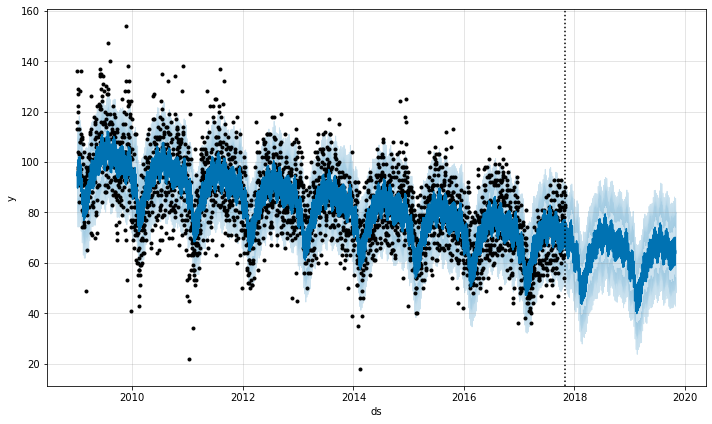

In [14]:
from datetime import datetime

m1.plot(forecast)
date = datetime(2017,11,1)
plt.axvline(date, color="k", linestyle=":")

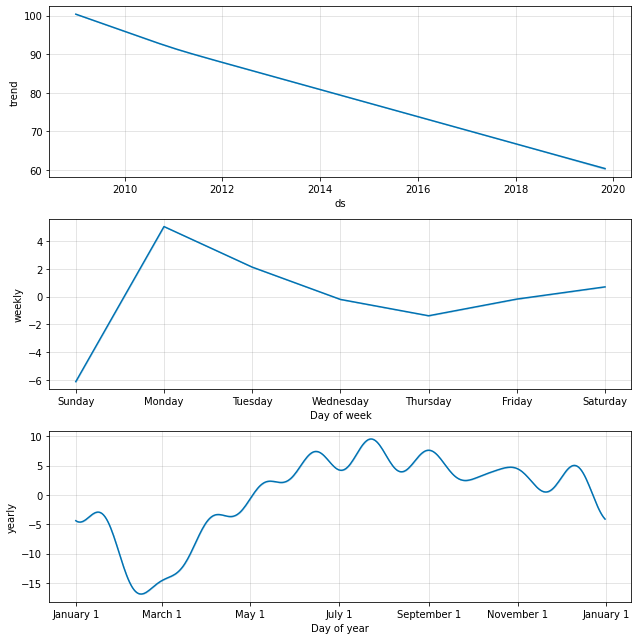

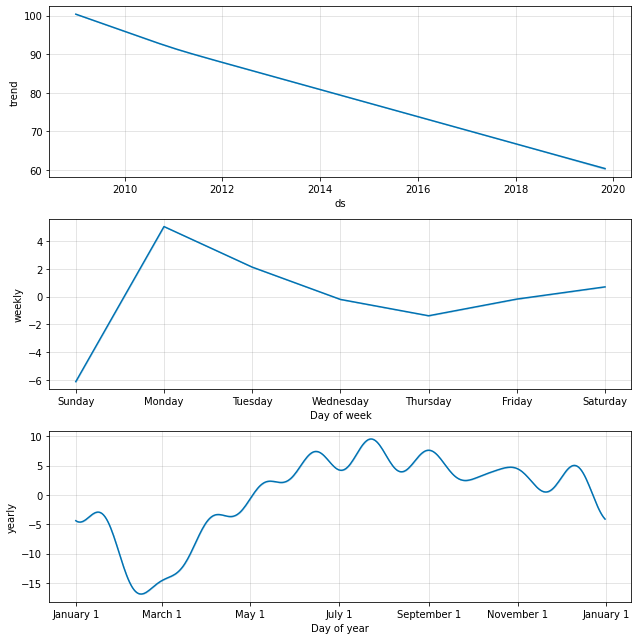

In [15]:
m1.plot_components(forecast)

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-01,100.379193,79.590394,109.255846,100.379193,100.379193,-5.750866,-5.750866,-5.750866,-1.373294,-1.373294,-1.373294,-4.377572,-4.377572,-4.377572,0.0,0.0,0.0,94.628327
1,2009-01-02,100.366942,81.476423,110.764245,100.366942,100.366942,-4.698469,-4.698469,-4.698469,-0.175843,-0.175843,-0.175843,-4.522626,-4.522626,-4.522626,0.0,0.0,0.0,95.668473
2,2009-01-03,100.354691,81.414208,112.085607,100.354691,100.354691,-3.900404,-3.900404,-3.900404,0.701007,0.701007,0.701007,-4.601410,-4.601410,-4.601410,0.0,0.0,0.0,96.454288
3,2009-01-04,100.342441,74.361871,104.724848,100.342441,100.342441,-10.723574,-10.723574,-10.723574,-6.106237,-6.106237,-6.106237,-4.617337,-4.617337,-4.617337,0.0,0.0,0.0,89.618866
4,2009-01-05,100.330190,85.538349,116.434143,100.330190,100.330190,0.457864,0.457864,0.457864,5.033373,5.033373,5.033373,-4.575509,-4.575509,-4.575509,0.0,0.0,0.0,100.788054


In [17]:
#Joining forecast df and original df(new_df) to compare actual y value and predicted y value
metric_df = forecast.set_index('ds')[['yhat']].join(new_df.set_index('ds').y).reset_index()
metric_df

,ds,yhat,y
0,2009-01-01,94.628327,116
1,2009-01-02,95.668473,136
2,2009-01-03,96.454288,113
3,2009-01-04,89.618866,97
4,2009-01-05,100.788054,129
...,...,...,...
3952,2019-10-28,70.133866,70
3953,2019-10-29,67.189290,71
3954,2019-10-30,64.815328,68
3955,2019-10-31,63.563519,57


In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
#Finding r2 score for our training data
r2_score(metric_df.y, metric_df.yhat)

0.55304761632523

In [20]:
#Finding mse score for our training data
mean_squared_error(metric_df.y, metric_df.yhat)

136.61091275179098

Testing dataset

In [21]:
test

,ds,y
3227,2017-11-02,78
3228,2017-11-03,71
3229,2017-11-04,61
3230,2017-11-05,76
3231,2017-11-06,87
...,...,...
4012,2019-12-27,58
4013,2019-12-28,61
4014,2019-12-29,72
4015,2019-12-30,90


In [22]:
forecast2 = m1.predict(test)
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-02,67.343141,54.764936,86.243717,67.343141,67.343141,2.951271,2.951271,2.951271,-1.373294,-1.373294,-1.373294,4.324564,4.324564,4.324564,0.0,0.0,0.0,70.294412
1,2017-11-03,67.333505,55.401868,86.605230,67.333505,67.333505,3.988792,3.988792,3.988792,-0.175843,-0.175843,-0.175843,4.164635,4.164635,4.164635,0.0,0.0,0.0,71.322297
2,2017-11-04,67.323869,57.437103,87.432999,67.323869,67.323869,4.679908,4.679908,4.679908,0.701007,0.701007,0.701007,3.978901,3.978901,3.978901,0.0,0.0,0.0,72.003778
3,2017-11-05,67.314234,49.886352,79.339861,67.314234,67.314234,-2.337446,-2.337446,-2.337446,-6.106237,-6.106237,-6.106237,3.768791,3.768791,3.768791,0.0,0.0,0.0,64.976788
4,2017-11-06,67.304598,59.869943,91.212315,67.304598,67.304598,8.569853,8.569853,8.569853,5.033373,5.033373,5.033373,3.536479,3.536479,3.536479,0.0,0.0,0.0,75.874450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2019-12-27,59.779040,43.591610,72.892838,59.585398,59.995734,-2.457372,-2.457372,-2.457372,-0.175843,-0.175843,-0.175843,-2.281529,-2.281529,-2.281529,0.0,0.0,0.0,57.321668
786,2019-12-28,59.769404,42.162308,72.616843,59.575471,59.986607,-2.083916,-2.083916,-2.083916,0.701007,0.701007,0.701007,-2.784922,-2.784922,-2.784922,0.0,0.0,0.0,57.685488
787,2019-12-29,59.759768,35.969596,65.004842,59.565545,59.977479,-9.342827,-9.342827,-9.342827,-6.106237,-6.106237,-6.106237,-3.236590,-3.236590,-3.236590,0.0,0.0,0.0,50.416941
788,2019-12-30,59.750132,45.880808,77.372635,59.555619,59.968352,1.403323,1.403323,1.403323,5.033373,5.033373,5.033373,-3.630051,-3.630051,-3.630051,0.0,0.0,0.0,61.153455


In [23]:
test_df = forecast2[['ds', 'yhat']].copy()
#test_df

In [24]:
#Joining forecast df (test_df) and original df (new_df) to compare actual y value and predicted y value
metric_df2 = test_df.set_index('ds')[['yhat']].join(new_df.set_index('ds').y).reset_index()
metric_df2.head()

,ds,yhat,y
0,2017-11-02,70.294412,78
1,2017-11-03,71.322297,71
2,2017-11-04,72.003778,61
3,2017-11-05,64.976788,76
4,2017-11-06,75.874450,87


In [25]:
r2_score(metric_df2.y, metric_df2.yhat)

0.14830122779010813

In [26]:
mean_squared_error(metric_df2.y, metric_df2.yhat)

110.31258722609506

<Figure size 28800x7920 with 0 Axes>

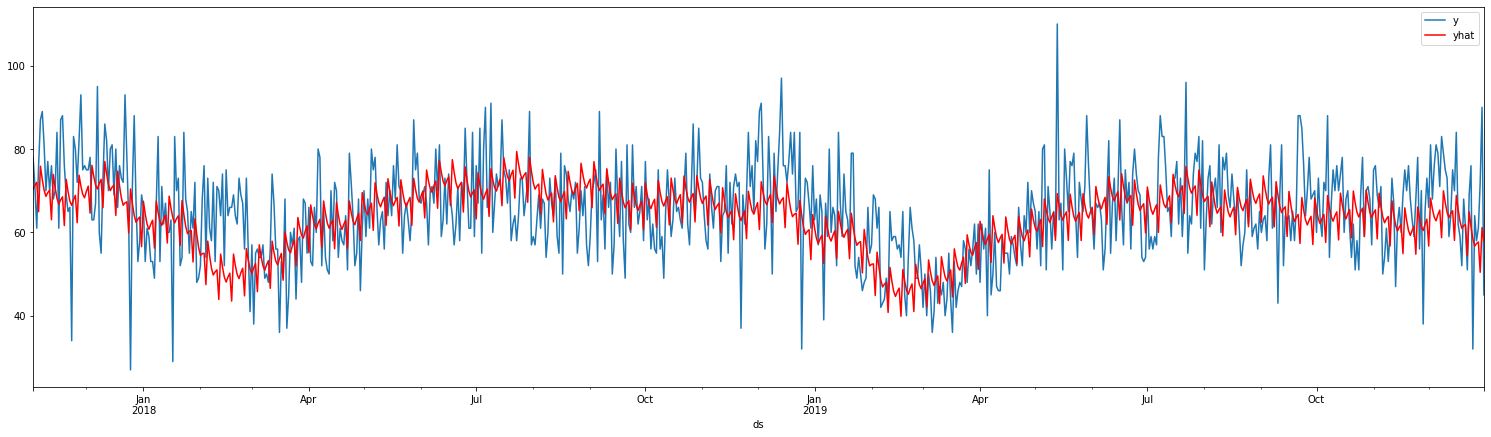

In [27]:
#Plotting actual values in our testing data (y) to the predicted values (yhat)
fig = plt.figure(facecolor='w', figsize=(400,110))
range = new_df.loc[new_df['ds'] >= "2017-11-02"]
ax = range.plot(x='ds', y='y')
metric_df2.plot(x='ds', y='yhat', ax=ax, color="red", figsize=(26, 7))

All data

In [28]:
#Creating new model, training on all our data, predicting following two years
m3 = Prophet(changepoint_prior_scale= 0.01, seasonality_prior_scale= .01)
m3.fit(new_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future3 = m3.make_future_dataframe(periods=731)
forecast3 = m3.predict(future3)
forecast3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-01,101.492828,80.122792,110.298566,101.492828,101.492828,-5.465639,-5.465639,-5.465639,-1.480120,-1.480120,-1.480120,-3.985519,-3.985519,-3.985519,0.0,0.0,0.0,96.027189
1,2009-01-02,101.477101,80.654665,112.277268,101.477101,101.477101,-4.314876,-4.314876,-4.314876,-0.165754,-0.165754,-0.165754,-4.149121,-4.149121,-4.149121,0.0,0.0,0.0,97.162226
2,2009-01-03,101.461375,82.847584,112.710283,101.461375,101.461375,-3.583731,-3.583731,-3.583731,0.664077,0.664077,0.664077,-4.247808,-4.247808,-4.247808,0.0,0.0,0.0,97.877644
3,2009-01-04,101.445648,77.398197,107.436819,101.445648,101.445648,-9.466729,-9.466729,-9.466729,-5.181074,-5.181074,-5.181074,-4.285655,-4.285655,-4.285655,0.0,0.0,0.0,91.978919
4,2009-01-05,101.429921,87.399479,116.465097,101.429921,101.429921,0.879582,0.879582,0.879582,5.147882,5.147882,5.147882,-4.268300,-4.268300,-4.268300,0.0,0.0,0.0,102.309503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2021-12-27,54.163951,43.095221,71.397700,53.748857,54.523083,3.107815,3.107815,3.107815,5.147882,5.147882,5.147882,-2.040067,-2.040067,-2.040067,0.0,0.0,0.0,57.271766
4744,2021-12-28,54.154788,38.202521,67.307410,53.739169,54.514529,-0.987300,-0.987300,-0.987300,1.555948,1.555948,1.555948,-2.543248,-2.543248,-2.543248,0.0,0.0,0.0,53.167488
4745,2021-12-29,54.145626,35.960670,65.021670,53.729481,54.505975,-3.529318,-3.529318,-3.529318,-0.540958,-0.540958,-0.540958,-2.988360,-2.988360,-2.988360,0.0,0.0,0.0,50.616308
4746,2021-12-30,54.136463,35.074885,62.671749,53.719793,54.497420,-4.850572,-4.850572,-4.850572,-1.480120,-1.480120,-1.480120,-3.370452,-3.370452,-3.370452,0.0,0.0,0.0,49.285891


In [30]:
#Filtering data to compare actual value to predicted value
new_dates = forecast3.loc[forecast3['ds'] <= "2019-12-31"]
new_dates

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-01,101.492828,80.122792,110.298566,101.492828,101.492828,-5.465639,-5.465639,-5.465639,-1.480120,-1.480120,-1.480120,-3.985519,-3.985519,-3.985519,0.0,0.0,0.0,96.027189
1,2009-01-02,101.477101,80.654665,112.277268,101.477101,101.477101,-4.314876,-4.314876,-4.314876,-0.165754,-0.165754,-0.165754,-4.149121,-4.149121,-4.149121,0.0,0.0,0.0,97.162226
2,2009-01-03,101.461375,82.847584,112.710283,101.461375,101.461375,-3.583731,-3.583731,-3.583731,0.664077,0.664077,0.664077,-4.247808,-4.247808,-4.247808,0.0,0.0,0.0,97.877644
3,2009-01-04,101.445648,77.398197,107.436819,101.445648,101.445648,-9.466729,-9.466729,-9.466729,-5.181074,-5.181074,-5.181074,-4.285655,-4.285655,-4.285655,0.0,0.0,0.0,91.978919
4,2009-01-05,101.429921,87.399479,116.465097,101.429921,101.429921,0.879582,0.879582,0.879582,5.147882,5.147882,5.147882,-4.268300,-4.268300,-4.268300,0.0,0.0,0.0,102.309503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,2019-12-27,60.861776,43.981289,73.618231,60.861776,60.861776,-1.934428,-1.934428,-1.934428,-0.165754,-0.165754,-0.165754,-1.768674,-1.768674,-1.768674,0.0,0.0,0.0,58.927348
4013,2019-12-28,60.852613,45.431490,74.339248,60.852613,60.852613,-1.634468,-1.634468,-1.634468,0.664077,0.664077,0.664077,-2.298545,-2.298545,-2.298545,0.0,0.0,0.0,59.218145
4014,2019-12-29,60.843450,38.045748,68.061510,60.843450,60.843450,-7.954484,-7.954484,-7.954484,-5.181074,-5.181074,-5.181074,-2.773409,-2.773409,-2.773409,0.0,0.0,0.0,52.888967
4015,2019-12-30,60.834288,47.809300,77.380019,60.834288,60.834288,1.960353,1.960353,1.960353,5.147882,5.147882,5.147882,-3.187529,-3.187529,-3.187529,0.0,0.0,0.0,62.794641


<Figure size 28800x7920 with 0 Axes>

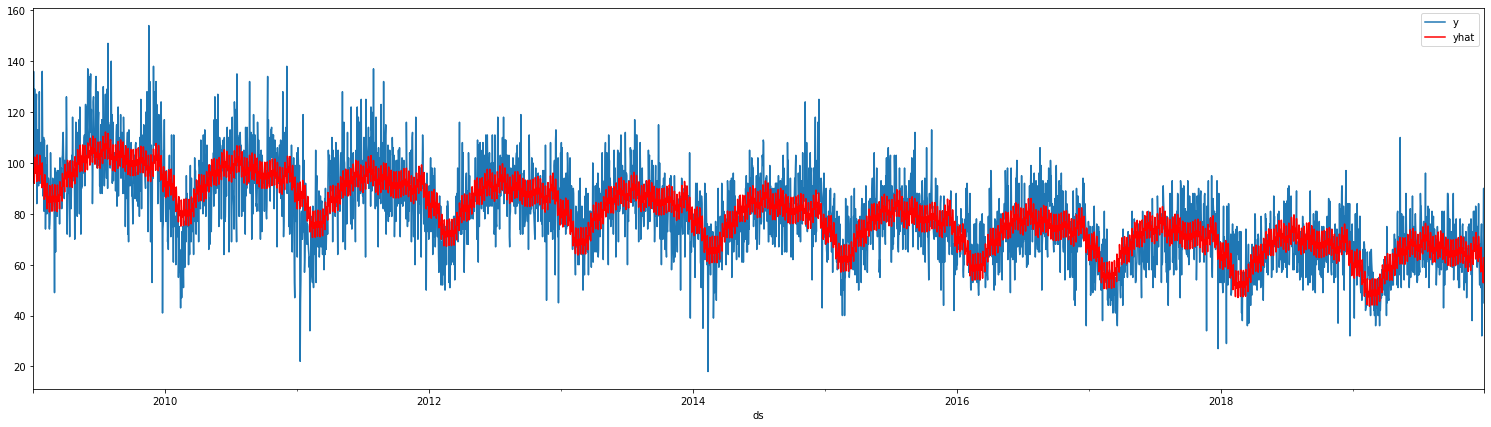

In [31]:
#Actual number of crimes per day compared to predicted number of crimes per day for 2009-2019
fig = plt.figure(facecolor='w', figsize=(400,110))
ax = new_df.plot(x='ds', y='y')
new_dates.plot(x='ds', y='yhat', ax=ax, color="red", figsize=(26, 7))

In [32]:
m3_test_df = forecast3[['ds', 'yhat']].copy()
m3_test_df.head()

,ds,yhat
0,2009-01-01,96.027189
1,2009-01-02,97.162226
2,2009-01-03,97.877644
3,2009-01-04,91.978919
4,2009-01-05,102.309503


In [33]:
metric_df3 = m3_test_df.set_index('ds')[['yhat']].join(new_df.set_index('ds').y).reset_index()
metric_df3.head()

,ds,yhat,y
0,2009-01-01,96.027189,116.0
1,2009-01-02,97.162226,136.0
2,2009-01-03,97.877644,113.0
3,2009-01-04,91.978919,97.0
4,2009-01-05,102.309503,129.0


In [34]:
metric3_predict = metric_df3.loc[metric_df3['ds'] <= "2019-12-31"]
metric3_predict.head()

,ds,yhat,y
0,2009-01-01,96.027189,116.0
1,2009-01-02,97.162226,136.0
2,2009-01-03,97.877644,113.0
3,2009-01-04,91.978919,97.0
4,2009-01-05,102.309503,129.0


In [35]:
r2_score(metric3_predict.y, metric3_predict.yhat)

0.5581231158059053

In [36]:
mean_squared_error(metric3_predict.y, metric3_predict.yhat)

135.0567693315427

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m3, horizon='60 days')
df_cv.head()

INFO:fbprophet:Making 120 forecasts with cutoffs between 2010-01-22 00:00:00 and 2019-11-01 00:00:00


  0%|          | 0/120 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-01-23,85.523965,69.588558,101.038275,89,2010-01-22
1,2010-01-24,79.708900,63.976864,95.991098,61,2010-01-22
2,2010-01-25,91.060724,74.565443,107.043496,111,2010-01-22
3,2010-01-26,90.304421,73.475719,107.126060,75,2010-01-22
4,2010-01-27,88.163808,71.174759,104.715237,79,2010-01-22


In [ ]:
df_p = performance_metrics(df_cv)
df_p.head(5)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,132.390495,11.506107,9.174721,0.123037,0.101513,0.831944
1,7 days,134.827107,11.611508,9.270288,0.125949,0.105323,0.831944
2,8 days,143.023464,11.959242,9.509379,0.129410,0.108980,0.819444
3,9 days,147.920025,12.162238,9.744784,0.132677,0.110544,0.808333
4,10 days,142.092121,11.920240,9.566285,0.130039,0.107845,0.819444


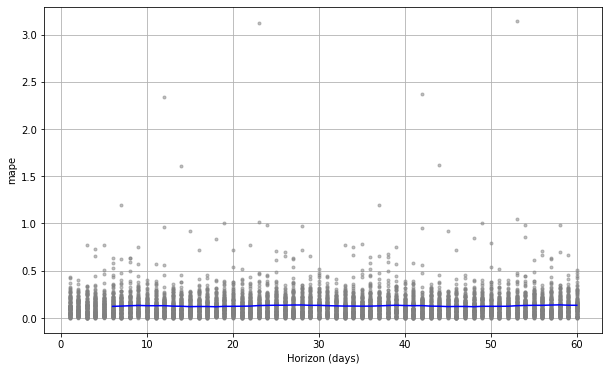

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

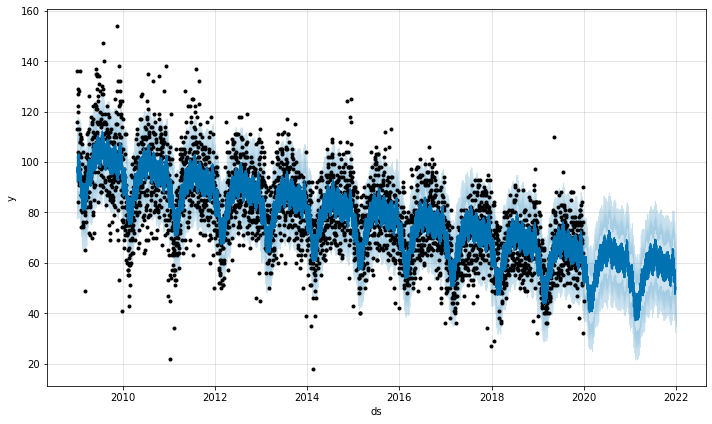

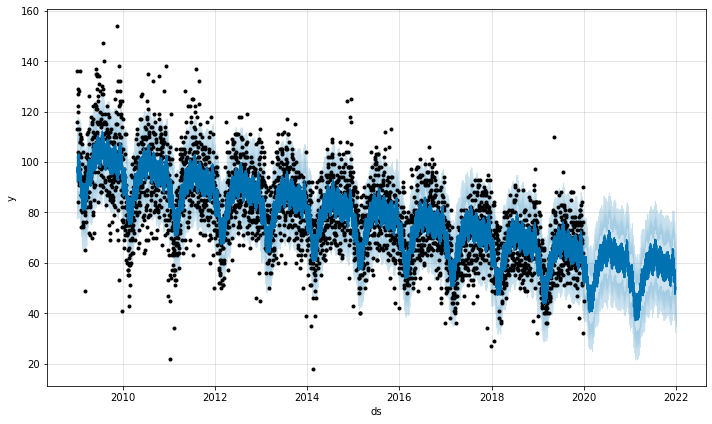

In [ ]:
m3.plot(forecast3)

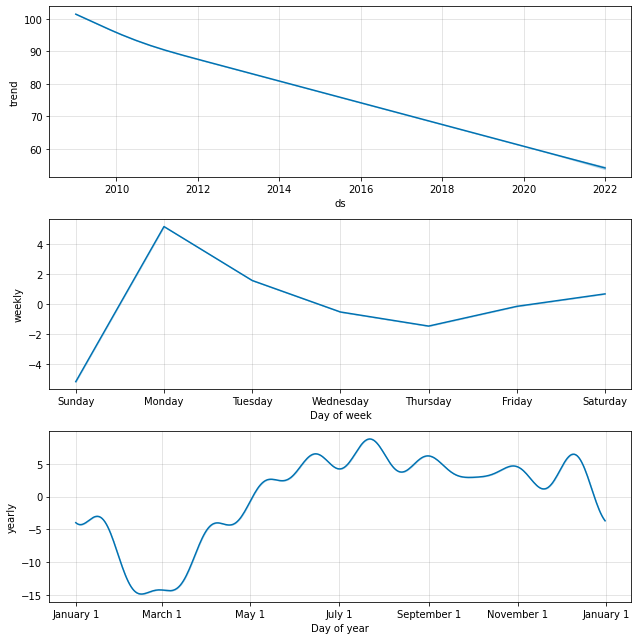

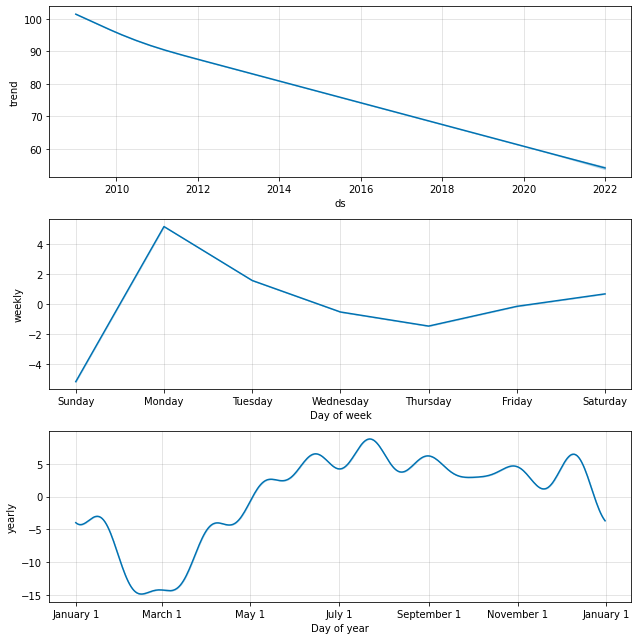

In [ ]:
m3.plot_components(forecast3)

In [ ]:
metric_df3

,ds,yhat,y
0,2009-01-01,96.027189,116.0
1,2009-01-02,97.162226,136.0
2,2009-01-03,97.877644,113.0
3,2009-01-04,91.978919,97.0
4,2009-01-05,102.309503,129.0
...,...,...,...
4743,2021-12-27,57.271766,NaN
4744,2021-12-28,53.167488,NaN
4745,2021-12-29,50.616308,NaN
4746,2021-12-30,49.285891,NaN


In [ ]:
#Creating dataframe with only forecasted values (2020-2021) for website
final_predictions_df = metric_df3.loc[metric_df3['ds'] > "2019-12-31"]
final_predictions_df

,ds,yhat,y
4017,2020-01-01,56.456298,NaN
4018,2020-01-02,55.294014,NaN
4019,2020-01-03,56.452136,NaN
4020,2020-01-04,57.189774,NaN
4021,2020-01-05,51.312000,NaN
...,...,...,...
4743,2021-12-27,57.271766,NaN
4744,2021-12-28,53.167488,NaN
4745,2021-12-29,50.616308,NaN
4746,2021-12-30,49.285891,NaN


In [ ]:
final_predictions_df = final_predictions_df.drop(columns = ['y'])
final_predictions_df

,ds,yhat
4017,2020-01-01,56.456298
4018,2020-01-02,55.294014
4019,2020-01-03,56.452136
4020,2020-01-04,57.189774
4021,2020-01-05,51.312000
...,...,...
4743,2021-12-27,57.271766
4744,2021-12-28,53.167488
4745,2021-12-29,50.616308
4746,2021-12-30,49.285891


In [ ]:
#Downloading table for website
from google.colab import files
final_predictions_df.to_csv('predictions_table_new.csv')
files.download("predictions_table_new.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>